In [66]:
import re
import pandas as pd
import geopandas as gpd
from shapely import Point, Polygon, make_valid
from shapely.ops import transform
from pyproj import Transformer

## Converting DMS coordinates into Shapely geometry

In [2]:
file_path = "../../extract/output/web_wikipedia_city.csv"

In [17]:
df = pd.read_csv(file_path)

In [14]:
def dms_to_dd(dms_str):
  match = re.match(r"(\d+)°(\d+)′([\d.]+)″?([NSEW])", dms_str.strip())
  degrees, minutes, seconds, direction = match.groups()
  dd = float(degrees) + float(minutes) / 60 + float(seconds) / 3600

  if direction in "SW":
    dd = -dd

  return dd

dms_to_dd("98°40′26″E")

98.6738888888889

In [18]:
def clean_coordinate(row):
  lon = dms_to_dd(row["longitude"])
  lat = dms_to_dd(row["latitude"])
  return Point(lon, lat)

df["geometry"] = df.apply(clean_coordinate, axis=1)

In [19]:
df

,id,name,full_name,category,longitude,latitude,url,geometry
0,2299e298-ce37-4f4f-9882-13a18825582f,Jakarta,Daerah Khusus Ibukota Jakarta,Special capital region,106°49′39″E,6°10′30″S,https://en.wikipedia.org/wiki/Jakarta,POINT (106.8275 -6.175000000000001)
1,87a60f91-a525-4aeb-a336-0089d58b46c2,Medan,Kota Medan,City,98°40′26″E,03°35′22″N,https://en.wikipedia.org/wiki/Medan,POINT (98.6738888888889 3.5894444444444447)
2,fab8a7e7-037e-4957-a7d6-e0b6986578d2,Makassar,Kota Makassar,City,119°24′49″E,5°7′59″S,https://en.wikipedia.org/wiki/Makassar,POINT (119.41361111111112 -5.133055555555555)
3,5aebf54a-bd66-4d67-ae80-0caa18b32610,Denpasar,Kota Denpasar,City,115°14′2″E,8°40′18″S,https://en.wikipedia.org/wiki/Denpasar,POINT (115.23388888888888 -8.671666666666667)
4,297d638a-e655-4b54-b18b-4d9179a14cd0,Ambon,Kota Ambon,City,128°10′42″E,3°41′48″S,"https://en.wikipedia.org/wiki/Ambon,_Maluku",POINT (128.1783333333333 -3.6966666666666668)
5,c01becf1-514b-4d62-af3b-a47da7cae0da,Jayapura,Kota Jayapura,City,140°43′1.2″E,2°31′58.8″S,https://en.wikipedia.org/wiki/Jayapura,POINT (140.717 -2.533)


In [22]:
gdf = gpd.GeoDataFrame(df, geometry="geometry", crs=4326)

gdf

,id,name,full_name,category,longitude,latitude,url,geometry
0,2299e298-ce37-4f4f-9882-13a18825582f,Jakarta,Daerah Khusus Ibukota Jakarta,Special capital region,106°49′39″E,6°10′30″S,https://en.wikipedia.org/wiki/Jakarta,POINT (106.8275 -6.175)
1,87a60f91-a525-4aeb-a336-0089d58b46c2,Medan,Kota Medan,City,98°40′26″E,03°35′22″N,https://en.wikipedia.org/wiki/Medan,POINT (98.67389 3.58944)
2,fab8a7e7-037e-4957-a7d6-e0b6986578d2,Makassar,Kota Makassar,City,119°24′49″E,5°7′59″S,https://en.wikipedia.org/wiki/Makassar,POINT (119.41361 -5.13306)
3,5aebf54a-bd66-4d67-ae80-0caa18b32610,Denpasar,Kota Denpasar,City,115°14′2″E,8°40′18″S,https://en.wikipedia.org/wiki/Denpasar,POINT (115.23389 -8.67167)
4,297d638a-e655-4b54-b18b-4d9179a14cd0,Ambon,Kota Ambon,City,128°10′42″E,3°41′48″S,"https://en.wikipedia.org/wiki/Ambon,_Maluku",POINT (128.17833 -3.69667)
5,c01becf1-514b-4d62-af3b-a47da7cae0da,Jayapura,Kota Jayapura,City,140°43′1.2″E,2°31′58.8″S,https://en.wikipedia.org/wiki/Jayapura,POINT (140.717 -2.533)


<Axes: >

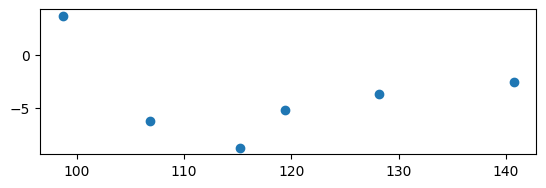

In [23]:
gdf.plot()

In [24]:
gdf.to_file("../output.gpkg", layer="indonesian_cities")

## Calculate distance

In [30]:
distance_matrix = gdf.geometry.apply(lambda geom: gdf.distance(geom))

distance_matrix

/var/folders/x2/fsb9vgcn65d5s9nbfh7b7p2r0000gn/T/ipykernel_95439/1264625262.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  distance_matrix = gdf.geometry.apply(lambda geom: gdf.distance(geom))


,0,1,2,3,4,5
0,0.000000,12.721075,12.629166,8.769305,21.494190,34.084635
1,12.721075,0.000000,22.499291,20.605059,30.390782,42.486557
2,12.629166,22.499291,0.000000,5.476481,8.881642,21.461469
3,8.769305,20.605059,5.476481,0.000000,13.867562,26.212062
4,21.494190,30.390782,8.881642,13.867562,0.000000,12.592549
5,34.084635,42.486557,21.461469,26.212062,12.592549,0.000000


In [32]:
distance_df = distance_matrix.set_index(gdf["name"])

distance_df

,0,1,2,3,4,5
name,,,,,,
Jakarta,0.000000,12.721075,12.629166,8.769305,21.494190,34.084635
Medan,12.721075,0.000000,22.499291,20.605059,30.390782,42.486557
Makassar,12.629166,22.499291,0.000000,5.476481,8.881642,21.461469
Denpasar,8.769305,20.605059,5.476481,0.000000,13.867562,26.212062
Ambon,21.494190,30.390782,8.881642,13.867562,0.000000,12.592549
Jayapura,34.084635,42.486557,21.461469,26.212062,12.592549,0.000000


In [33]:
distance_df.columns = gdf["name"]

In [34]:
distance_df

name,Jakarta,Medan,Makassar,Denpasar,Ambon,Jayapura
name,,,,,,
Jakarta,0.000000,12.721075,12.629166,8.769305,21.494190,34.084635
Medan,12.721075,0.000000,22.499291,20.605059,30.390782,42.486557
Makassar,12.629166,22.499291,0.000000,5.476481,8.881642,21.461469
Denpasar,8.769305,20.605059,5.476481,0.000000,13.867562,26.212062
Ambon,21.494190,30.390782,8.881642,13.867562,0.000000,12.592549
Jayapura,34.084635,42.486557,21.461469,26.212062,12.592549,0.000000


### Using metric units

In [44]:
distance_matrix_metric = gdf.to_crs(3857).geometry.apply(lambda geom: gdf.distance(geom) / 1_000_000)

distance_matrix_metric

/var/folders/x2/fsb9vgcn65d5s9nbfh7b7p2r0000gn/T/ipykernel_95439/3257439098.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  distance_matrix_metric = gdf.to_crs(3857).geometry.apply(lambda geom: gdf.distance(geom) / 1_000_000)


,0,1,2,3,4,5
0,11.911803,11.911812,11.911791,11.911795,11.911782,11.911770
1,10.991495,10.991503,10.991483,10.991487,10.991474,10.991461
2,13.305264,13.305272,13.305251,13.305255,13.305243,13.305230
3,12.864220,12.864229,12.864207,12.864211,12.864199,12.864186
4,14.274581,14.274589,14.274568,14.274572,14.274560,14.274547
5,15.666977,15.666985,15.666965,15.666969,15.666956,15.666943


In [45]:
pd.options.display.float_format = "{:.2f}".format

In [46]:
distance_matrix_metric

,0,1,2,3,4,5
0,11.91,11.91,11.91,11.91,11.91,11.91
1,10.99,10.99,10.99,10.99,10.99,10.99
2,13.31,13.31,13.31,13.31,13.31,13.31
3,12.86,12.86,12.86,12.86,12.86,12.86
4,14.27,14.27,14.27,14.27,14.27,14.27
5,15.67,15.67,15.67,15.67,15.67,15.67


In [47]:
distance_df = distance_matrix.set_index(gdf["name"])
distance_df.columns = gdf["name"]

distance_df

name,Jakarta,Medan,Makassar,Denpasar,Ambon,Jayapura
name,,,,,,
Jakarta,0.00,12.72,12.63,8.77,21.49,34.08
Medan,12.72,0.00,22.50,20.61,30.39,42.49
Makassar,12.63,22.50,0.00,5.48,8.88,21.46
Denpasar,8.77,20.61,5.48,0.00,13.87,26.21
Ambon,21.49,30.39,8.88,13.87,0.00,12.59
Jayapura,34.08,42.49,21.46,26.21,12.59,0.00


## Calculate cities travel distance with perimeter

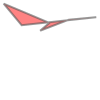

In [ ]:
Polygon(gdf.geometry.tolist())

In [52]:
cities_travel_poly = Polygon(gdf.geometry.tolist())

In [53]:
cities_travel_poly.length

101.24159277281578

### Calculate using metric (km) distance

In [56]:
transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)

transformer

<Concatenated Operation Transformer: pipeline>
Description: axis order change (2D) + Popular Visualisation Pseudo-Mercator
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)

In [75]:
polygon_projected = transform(transformer.transform, cities_travel_poly)

In [76]:
print(cities_travel_poly)
print(polygon_projected)

POLYGON ((106.8275 -6.175000000000001, 98.6738888888889 3.5894444444444447, 119.41361111111112 -5.133055555555555, 115.23388888888888 -8.671666666666667, 128.1783333333333 -3.6966666666666668, 140.717 -2.533, 106.8275 -6.175000000000001))
POLYGON ((11891982.902718432 -688732.449508249, 10984327.065703167 399836.75493146083, 13293062.382674886 -572175.0361374062, 12827777.833239777 -969032.1452182971, 14268746.797397148 -411796.8480814372, 15664544.78595708 -282064.16531770246, 11891982.902718432 -688732.449508249))


In [78]:
travel_distance = polygon_projected.length / 1_000

travel_distance

11275.07238292075

In [83]:
"{:,.2f} km".format(travel_distance)

'11,275.07 km'